# ライブラリ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import math
from PIL import Image
from tqdm import tqdm

#自作ライブラリ
import lib.image_resizer as rs
import lib.normarizer as nm

# データの下処理

### angleのロード

- center= 1689 , theta= 1.0087838730812335


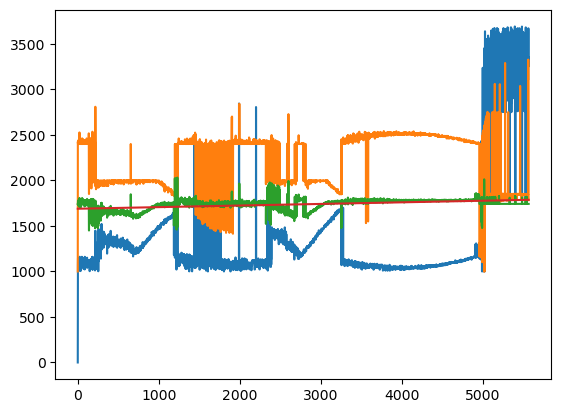

(3708, 5566)


In [2]:
def centerfinder(angle):
    #y-trim
    top_trim=1000
    bottom_trim=1000

    #平均値＆標準偏差-窓x座標
    x1=1000
    x2=1500

    #y-blank
    y1=2000
    y2=2400
    angle_graph=angle
    angle_graph[0:top_trim]=0
    angle_graph[angle_graph.shape[0]-bottom_trim:angle_graph.shape[0]]
    #angle=angle[:,x1:x2]

    blank=np.zeros_like(angle_graph)
    blank[0:y1,:]=1
    blank[y2:angle_graph.shape[0],:]=1
    angle_graph=angle_graph*blank
    max_index=angle_graph.argmax(axis=0)
    min_index=angle_graph.argmin(axis=0)

    center=(max_index+min_index)/2

    std=np.std(center[x1:x2])
    mean=np.mean(center[x1:x2])

    center[center>mean+std*3]=mean
    center[center<mean-std*3]=mean    

    func = np.poly1d(np.polyfit(range(center.shape[0]),center, 1))

    line=func(range(center.shape[0]))

    center_mean=int(round(func.c[1]))
    theta=math.degrees(math.atan(func.c[0]))
    print("- center=",center_mean,", theta=",theta)

    axis_y=round(center_mean)

    
    return theta,max_index,min_index,center,line,axis_y
    



angle=np.load("angle/angle_2410.npy")

theta,max_index,min_index,center,line,axis_y=centerfinder(angle)
plt.plot(max_index)
plt.plot(min_index)
plt.plot(center)
plt.plot(line)
plt.show()

print(angle.shape)


- center= 1689 , theta= 1.0087838730812335
- center= 1687 , theta= 1.0286877665276162
- center= 1690 , theta= 0.9997273957769832
- center= 1692 , theta= 0.987751452954074
- center= 1694 , theta= 0.9688770072708188
- center= 1696 , theta= 0.9458635090002837
- center= 1699 , theta= 0.9269860188442622
- center= 1701 , theta= 0.9138531152511342
- center= 1705 , theta= 0.8774824344335077
- center= 1708 , theta= 0.8446547349871892
- center= 1711 , theta= 0.8157375747742193
- center= 1714 , theta= 0.7945713016010474
- center= 1717 , theta= 0.7612876734305228
- center= 1720 , theta= 0.7316360472600287
- center= 1723 , theta= 0.7143396593976392
- center= 1725 , theta= 0.6921538269289995
- center= 1728 , theta= 0.6769945031340092
- center= 1731 , theta= 0.647149792892698
- center= 1733 , theta= 0.6405287932133507
- center= 1735 , theta= 0.6238214329785503
- center= 1737 , theta= 0.6123868417759917
- center= 1739 , theta= 0.6075382363341371
- center= 1741 , theta= 0.5969923091274564
- center= 174

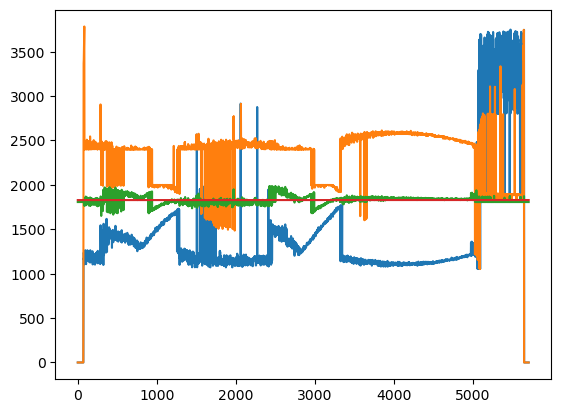

In [3]:
theta=10
e=1e-2
while abs(theta) > e:
    theta,_,_,_,_,_=centerfinder(angle)
    #print(theta)
    image=Image.fromarray(angle)
    if theta>0:
        image=image.rotate(theta/50, expand=True)
    else:
        image=image.rotate(theta/50, expand=True)
    angle=np.array(image)

theta,max_index,min_index,center,line,axis_y=centerfinder(angle)
plt.plot(max_index)
plt.plot(min_index)
plt.plot(center)
plt.plot(line)
plt.show()

In [4]:
#オブジェクトの中心が画像の中心になるようにクロップ
if axis_y < angle.shape[0]-axis_y:
    angle_crop=angle[0:axis_y*2]
    print("if")
else:
    angle_crop=angle[-axis_y*2:]
    print("else")

if


(3658, 5708)


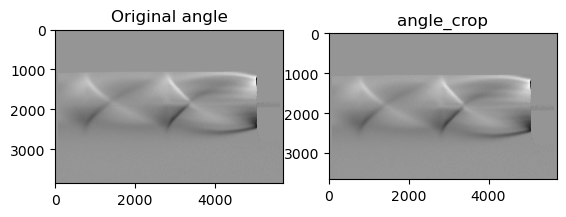

In [5]:
# 2つの画像を表示
plt.figure(figsize=(10, 5))

# 元の画像を表示
plt.subplot(1, 3, 1)
plt.imshow(angle, cmap='gray')
plt.title('Original angle')

# 処理後の画像を表示
plt.subplot(1, 3, 2)
plt.imshow(angle_crop, cmap='gray')
plt.title('angle_crop')
angle=angle_crop
print(angle.shape)

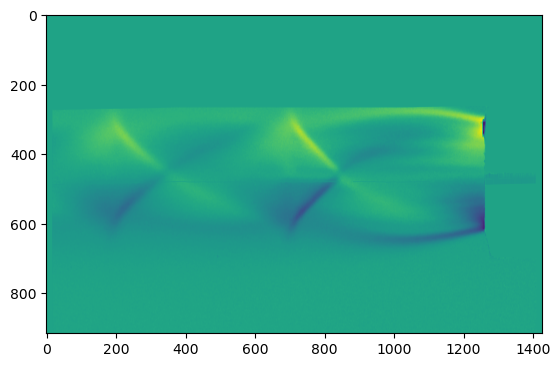

In [6]:
#画像のresize
angle=rs.resize_image(angle,(1427,915))
# 画像の正規化：保留
# angle,df_config["min_val"],df_config["max_val"]=nm.normalize(angle)
# angle=np.array(angle)
# print(angle.shape,df_config["min_val"],df_config["min_val"])
# angle=np.abs(angle)
plt.imshow(angle)

# シノグラムの生成

In [7]:
angle=np.rot90(angle)
height=angle.shape[1]
sinogram = np.empty((angle.shape[0], height, height), dtype=angle.dtype)

for i, d_angle in enumerate(tqdm(angle)):
    sinogram[i] = np.broadcast_to(d_angle[:, np.newaxis], (height, height))

np.save("sinogram/sinogram_2410_quarter_size.npy", sinogram)

100%|██████████| 1427/1427 [00:00<00:00, 1975.89it/s]
